In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn.svm
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy
import matplotlib.pyplot
  
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [3]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
attacks_types = {
    'normal': '1',
'back': '2',
'buffer_overflow': '3',
'ftp_write': '4',
'guess_passwd': '4',
'imap': '4',
'ipsweep': '5',
'land': '2',
'loadmodule': '3',
'multihop': '4',
'neptune': '2',
'nmap': '5',
'perl': '3',
'phf': '4',
'pod': '2',
'portsweep': '5',
'rootkit': '3',
'satan': '5',
'smurf': '2',
'spy': '4',
'teardrop': '2',
'warezclient': '4',
'warezmaster': '4',
}
attacks_names = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [5]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)
dy = pd.read_csv(path,names=columns)
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
dy['Attack Type'] = df.target.apply(lambda r:attacks_names[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [6]:
dy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [7]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [8]:
df['Attack Type'].value_counts()

2    391458
1     97278
5      4107
4      1126
3        52
Name: Attack Type, dtype: int64

In [9]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

In [10]:
#Mapping protocol types to numbers for easier calculation

In [11]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [12]:
#Mapping flags to numbers for easier calculation

In [13]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [14]:
#Removing correlated data 

In [15]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [16]:
#removing irrelevant features

In [17]:
df.drop('service',axis = 1,inplace= True)
df.drop('target',axis = 1,inplace= True)

In [18]:
#Performing Feature Selection 

In [19]:
#Part 1: Genetic Algorithm

In [20]:
print(df.shape)

Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [21]:
data_inputs = X_train
data_outputs = Y_train.values.ravel()

In [22]:
def reduce_features(solution, features):
    selected_elements_indices = numpy.where(solution == 1)[0]
    reduced_features = features[:, selected_elements_indices]
    return reduced_features


def classification_accuracy(labels, predictions):
    correct = numpy.where(labels == predictions)[0]
    accuracy = correct.shape[0]/labels.shape[0]
    return accuracy


def cal_pop_fitness(pop, features, labels, train_indices, test_indices):
    accuracies = numpy.zeros(pop.shape[0])
    idx = 0

    for curr_solution in pop:
        reduced_features = reduce_features(curr_solution, features)
        train_data = reduced_features[train_indices, :]
        test_data = reduced_features[test_indices, :]
      

        train_labels = labels[train_indices]
        test_labels = labels[test_indices]


        SV_classifier = sklearn.svm.SVC(gamma='scale')
        SV_classifier.fit(X=train_data, y=train_labels)

        predictions = SV_classifier.predict(test_data)
        accuracies[idx] = classification_accuracy(test_labels, predictions)
        idx = idx + 1
    return accuracies

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover, num_mutations=2):
    mutation_idx = numpy.random.randint(low=0, high=offspring_crossover.shape[1], size=num_mutations)
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        offspring_crossover[idx, mutation_idx] = 1 - offspring_crossover[idx, mutation_idx]
    return offspring_crossover

In [23]:
num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]

In [24]:
train_indices = numpy.arange(1, num_samples, 4)
test_indices = numpy.arange(0, num_samples, 4)
print(test_indices.shape)
test_indices.shape
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

(82749,)
Number of training samples:  82749
Number of test samples:  82749


In [25]:
"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""

'\nGenetic algorithm parameters:\n    Population size\n    Mating pool size\n    Number of mutations\n'

In [26]:
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.

In [27]:
# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

In [28]:
# Creating the initial population.
new_population = numpy.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)

(8, 32)


In [29]:
start_time = time.time()
best_outputs = []
num_generations = 1
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
end_time = time.time()

Generation :  0
Best result :  0.9936434277151386


In [30]:
ga_train = end_time - start_time
ga_train

216.26284337043762

In [31]:
start_time = time.time()
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]
end_time = time.time()
ga_best_sol = end_time - start_time

In [32]:
ga_best_sol

510.4786801338196

In [33]:
best_solution = new_population[best_match_idx, :]
best_solution_indices = numpy.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

In [34]:
print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

best_match_idx :  5
best_solution :  [1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0]
Selected indices :  [ 0  1  4  6  7  8  9 10 11 13 15 17 19 22 25 27 28 30]
Number of selected elements :  18
Best solution fitness :  0.995069426820868


In [35]:
for i in best_solution_indices:
    print(columns[i], end=" ")

duration protocol_type src_bytes land wrong_fragment urgent hot num_failed_logins logged_in root_shell num_root num_shells num_outbound_cmds count srv_serror_rate srv_rerror_rate same_srv_rate srv_diff_host_rate 

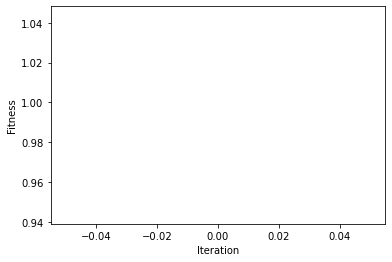

In [36]:
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [37]:
#Part 2: Fuzzy C Means Clustering 

In [38]:
import numpy as np, numpy.random
import pandas as pd
from scipy.spatial import distance
k = 2
p = 5
dat = df.drop(['Attack Type',], axis=1)

In [39]:
n = len(dat)
d = len(dat.columns)
addZeros = np.zeros((n, 1))
dat = np.append(dat, addZeros, axis=1)
print("The FCM algorithm: \n")
print("The training data: \n", dat)
print("\nTotal number of data: ",n)
print("Total number of features: ",d)
print("Total number of Clusters: ",k)

The FCM algorithm: 

The training data: 
 [[0.   1.   0.   ... 0.11 0.   0.  ]
 [0.   1.   0.   ... 0.05 0.   0.  ]
 [0.   1.   0.   ... 0.03 0.   0.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 0.  ]
 [0.   1.   0.   ... 0.04 0.05 0.  ]
 [0.   1.   0.   ... 0.17 0.05 0.  ]]

Total number of data:  494021
Total number of features:  32
Total number of Clusters:  2


In [40]:
C = np.zeros((k,d+1))
C

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [41]:
weight = np.random.dirichlet(np.ones(k),size=n)
print("\nThe initial weight: \n", np.round(weight,2))


The initial weight: 
 [[0.05 0.95]
 [0.7  0.3 ]
 [0.74 0.26]
 ...
 [0.17 0.83]
 [0.82 0.18]
 [0.48 0.52]]


In [42]:
for it in range(3): # Total number of iterations
    
    # Compute centroid
    for j in range(k):
        denoSum = sum(np.power(weight[:,j],2))
        
        sumMM =0
        for i in range(n):
            mm = np.multiply(np.power(weight[i,j],p),dat[i,:])
            sumMM +=mm
        cc = sumMM/denoSum
        C[j] = np.reshape(cc,d+1)
 
    #Updating the fuzzy pseudo partition
    for i in range(n):
        denoSumNext = 0
        for j in range(k):
             denoSumNext += np.power(1/distance.euclidean(C[j,0:d], dat[i,0:d]),1/(p-1))
        for j in range(k):
            w = np.power((1/distance.euclidean(C[j,0:d], dat[i,0:d])),1/(p-1))/denoSumNext
            weight[i,j] = w

In [43]:
print("\nThe final weights: \n", np.round(weight,2))


The final weights: 
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


In [44]:
for i in range(n):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    dat[i,d] = cNumber[0]
    
print("\nThe data with cluster number: \n", dat)


The data with cluster number: 
 [[0.   1.   0.   ... 0.11 0.   0.  ]
 [0.   1.   0.   ... 0.05 0.   1.  ]
 [0.   1.   0.   ... 0.03 0.   0.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 0.  ]
 [0.   1.   0.   ... 0.04 0.05 0.  ]
 [0.   1.   0.   ... 0.17 0.05 0.  ]]


In [45]:
clus1 = np.flatnonzero(dat[-1])

In [46]:
clus1

array([ 1,  3,  4, 10, 20, 21, 24, 26, 27, 28, 30, 31], dtype=int64)

In [47]:
for i in clus1:
    print(columns[i], end = " ")

protocol_type flag src_bytes num_failed_logins is_host_login is_guest_login serror_rate rerror_rate srv_rerror_rate same_srv_rate srv_diff_host_rate dst_host_count 

In [48]:
ind = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

In [49]:
clus2 = []
for i in ind:
    if i not in clus1:
        clus2.append(i)
len(clus2)


20

In [50]:
clus2.sort()

In [51]:
clus2

[0, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 25, 29]

In [52]:
for i in clus2: 
    print(columns[i], end = " ")

duration service dst_bytes land wrong_fragment urgent hot logged_in num_compromised root_shell su_attempted num_root num_file_creations num_shells num_access_files num_outbound_cmds count srv_count srv_serror_rate diff_srv_rate 

In [53]:
best_solution_indices

array([ 0,  1,  4,  6,  7,  8,  9, 10, 11, 13, 15, 17, 19, 22, 25, 27, 28,
       30], dtype=int64)

In [54]:
len(best_solution_indices)

18

In [55]:
ifs = best_solution_indices.tolist()
#a = []

In [58]:
if len(clus1)<len(clus2):
    for i in clus1:
        if i not in best_solution_indices:
            ifs.append(i)
else: 
    for i in clus2:
        if i not in best_solution_indices:
            ifs.append(i)

In [59]:
ifs.sort()
ifs = numpy.array(ifs)


In [60]:
for i in ifs:
    print(columns[i], end = " ")

duration protocol_type flag src_bytes land wrong_fragment urgent hot num_failed_logins logged_in root_shell num_root num_shells num_outbound_cmds is_host_login is_guest_login count serror_rate srv_serror_rate rerror_rate srv_rerror_rate same_srv_rate srv_diff_host_rate dst_host_count 

In [64]:
len(ifs)

24

In [61]:
testObj = pd.DataFrame(df)
dataset= testObj.iloc[:,best_solution_indices]

In [62]:
#Classification using Machine Learning

In [63]:
# Target variable and train set
Y = df[['Attack Type']]
X = dataset

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 18) (163027, 18)
(330994, 1) (163027, 1)


In [65]:
#Random Forest 

In [66]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)
start_time = time.time()
rf = model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
rf_train_time = end_time-start_time

In [67]:
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
rf_test_time = end_time-start_time
print("Testing time: ",end_time-start_time)
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))
rf_test_accuracy = model3.score(X_test,Y_test)
rf_train_accuracy = model3.score(X_train, Y_train)

Training time:  4.050214052200317
Testing time:  0.33498215675354004
Train score is: 0.9998157066291232
Test score is: 0.9992884614205009


In [68]:
#Performance Metrics

In [69]:
import sklearn.metrics as metrics

y_pred = rf.predict(X)
print ("accuracy",metrics.accuracy_score(Y, y_pred))
print ("f1 score macro",metrics.f1_score(Y, y_pred, average='macro')) 
print ("f1 score micro",metrics.f1_score(Y, y_pred, average='micro'))
print ("precision score",metrics.precision_score(Y, y_pred, average='macro') )
print ("recall score",metrics.recall_score(Y, y_pred, average='macro') )
print ("hamming_loss",metrics.hamming_loss(Y, y_pred))
print ("Classification Report: ")
print (metrics.classification_report(Y, y_pred))

accuracy 0.9996417156355701
f1 score macro 0.9721204472285387
f1 score micro 0.9996417156355701
precision score 0.9929030187469785
recall score 0.9545702175813984
hamming_loss 0.0003582843644298522
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     97278
           2       1.00      1.00      1.00    391458
           3       0.98      0.81      0.88        52
           4       0.99      0.98      0.98      1126
           5       1.00      0.99      0.99      4107

    accuracy                           1.00    494021
   macro avg       0.99      0.95      0.97    494021
weighted avg       1.00      1.00      1.00    494021



In [70]:
#Confusion Matrix Random Forest

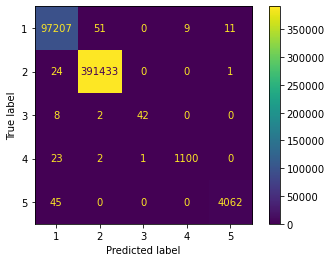

In [71]:
from sklearn.metrics import plot_confusion_matrix
Yn = dy[['Attack Type']]
plot_confusion_matrix(model3, X, Y)  

In [72]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [73]:
model1 = GaussianNB()
start_time = time.time()
nb = model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
nb_train_time = end_time-start_time
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
nb_test_time = end_time-start_time
print("Testing time: ",end_time-start_time)
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))
nb_train_accuracy = model1.score(X_train, Y_train)
nb_test_accuracy = model1.score(X_test,Y_test)

Training time:  0.33263516426086426
Testing time:  0.12906098365783691
Train score is: 0.8842607418865599
Test score is: 0.8837370496911554


In [74]:
import sklearn.metrics as metrics


y_pred = nb.predict(X)
print ("accuracy",metrics.accuracy_score(Y, y_pred))
print ("f1 score macro",metrics.f1_score(Y, y_pred, average='macro')) 
print ("f1 score micro",metrics.f1_score(Y, y_pred, average='micro'))
print ("precision score",metrics.precision_score(Y, y_pred, average='macro') )
print ("recall score",metrics.recall_score(Y, y_pred, average='macro') )
print ("hamming_loss",metrics.hamming_loss(Y, y_pred))
print ("Classification Report: ")
print (metrics.classification_report(Y, y_pred))

accuracy 0.8840879233878721
f1 score macro 0.45434854746730713
f1 score micro 0.8840879233878721
precision score 0.48267795204814207
recall score 0.7288259616376579
hamming_loss 0.11591207661212782
Classification Report: 
              precision    recall  f1-score   support

           1       0.97      0.66      0.79     97278
           2       0.97      0.94      0.96    391458
           3       0.01      0.87      0.01        52
           4       0.38      0.35      0.36      1126
           5       0.08      0.83      0.15      4107

    accuracy                           0.88    494021
   macro avg       0.48      0.73      0.45    494021
weighted avg       0.96      0.88      0.92    494021



In [75]:
#Confusion Matrix Gaussian Naive Bayes

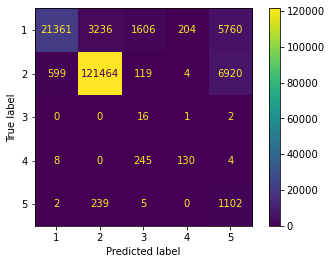

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, Y_test)  

In [77]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [78]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [79]:
start_time = time.time()
dt = model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
dt_train_time = end_time-start_time
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
dt_test_time = end_time-start_time
print("Testing time: ",end_time-start_time)
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))
dt_train_score = model2.score(X_train, Y_train)
dt_test_score = model2.score(X_test,Y_test)

Training time:  0.45514750480651855
Testing time:  0.013076305389404297
Train score is: 0.991178087820323
Test score is: 0.9908236059057702


In [80]:
#Performance Metrics

In [81]:
import sklearn.metrics as metrics


y_pred = dt.predict(X)
print ("accuracy",metrics.accuracy_score(Y, y_pred))
print ("f1 score macro",metrics.f1_score(Y, y_pred, average='macro')) 
print ("f1 score micro",metrics.f1_score(Y, y_pred, average='micro'))
print ("precision score",metrics.precision_score(Y, y_pred, average='macro') )
print ("recall score",metrics.recall_score(Y, y_pred, average='macro') )
print ("hamming_loss",metrics.hamming_loss(Y, y_pred))
print ("Classification Report: ")
print (metrics.classification_report(Y, y_pred))

accuracy 0.9910611087382925
f1 score macro 0.7205088973408291
f1 score micro 0.9910611087382925
precision score 0.8656636343527492
recall score 0.6680487868201148
hamming_loss 0.008938891261707499
Classification Report: 
              precision    recall  f1-score   support

           1       0.98      0.99      0.98     97278
           2       1.00      1.00      1.00    391458
           3       0.70      0.40      0.51        52
           4       0.91      0.24      0.38      1126
           5       0.74      0.71      0.73      4107

    accuracy                           0.99    494021
   macro avg       0.87      0.67      0.72    494021
weighted avg       0.99      0.99      0.99    494021



In [82]:
#Confusion Matrix Decision Tree

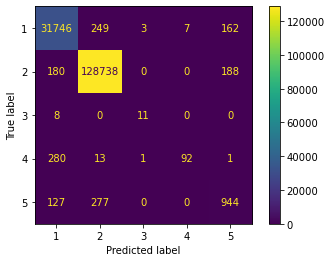

In [83]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_test, Y_test)  

In [84]:
#Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(random_state=0)
start_time = time.time()
gb = model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
gb_train_time = end_time-start_time
print("Training time: ",end_time-start_time)
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
gb_test_time = end_time-start_time
print("Testing time: ",end_time-start_time)
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))
gb_train_score = model6.score(X_train, Y_train)
gb_test_score = model6.score(X_test,Y_test)

Training time: 140.6633870601654
Testing time: 0.6365442276000977
Train score is: 0.9584863773965691
Test score is: 0.9684051721493986


In [87]:
#Performance Metrics

In [100]:
import sklearn.metrics as metrics


y_pred = gb.predict(X)
print ("accuracy",metrics.accuracy_score(Y, y_pred))
print ("f1 score macro",metrics.f1_score(Y, y_pred, average='macro')) 
print ("f1 score micro",metrics.f1_score(Y, y_pred, average='micro'))
print ("precision score",metrics.precision_score(Y, y_pred, average='macro') )
print ("recall score",metrics.recall_score(Y, y_pred, average='macro') )
print ("hamming_loss",metrics.hamming_loss(Y, y_pred))
print ("Classification Report: ")
print (metrics.classification_report(Y, y_pred))

accuracy 0.9687241498989
f1 score macro 0.8372862078142997
f1 score micro 0.9984595796534965
precision score 0.8420655699470411
recall score 0.8392693742929176
hamming_loss 0.0015404203465034887
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     97278
           2       1.00      1.00      1.00    391458
           3       0.26      0.38      0.31        52
           4       0.97      0.85      0.91      1126
           5       0.99      0.96      0.98      4107

    accuracy                           1.00    494021
   macro avg       0.84      0.84      0.84    494021
weighted avg       1.00      1.00      1.00    494021



In [ ]:
#Confusion Matrix

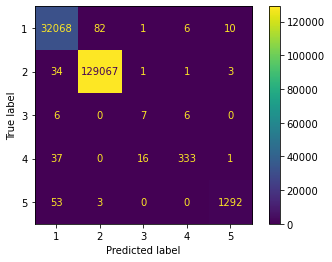

In [101]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model6, X_test, Y_test)  

In [89]:
#Performance Evaluation (Visualization)

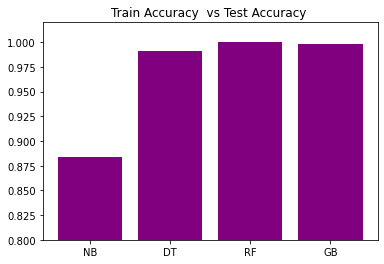

In [90]:
names = ['NB','DT','RF','GB']
accuracy_met = [nb_train_accuracy, dt_train_score, rf_train_accuracy, gb_train_score]
accuracy_test = [nb_test_accuracy, dt_test_score,rf_train_accuracy,gb_test_score]
#%matplotlib inline
plt.ylim(.8,1.02)
plt.title("Train Accuracy  vs Test Accuracy ")
plt.bar(names,accuracy_met, color="orange", label="Train")
plt.bar(names, accuracy_test,color="purple", label="Test")
plt.show()


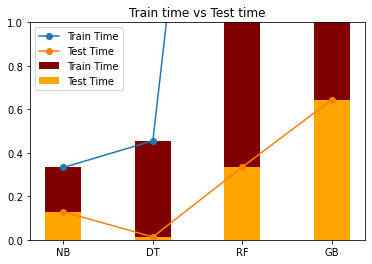

In [91]:
names = ['NB','DT','RF','GB']
train_time = [nb_train_time, dt_train_time, rf_train_time, gb_train_time]
test_time = [nb_test_time, dt_test_time, rf_test_time, gb_test_time]
%matplotlib inline
plt.ylim(0,1)
plt.title("Train time vs Test time")
plt.plot(names, train_time, "-o", label="Train Time")
plt.plot(names, test_time, "-o", label="Test Time")
plt.bar(names, train_time,color ='maroon',
        width = 0.4, label = "Train Time")
plt.bar(names, test_time, color ='orange',
        width = 0.4, label = "Test Time")

plt.legend(loc="upper left")

<BarContainer object of 4 artists>

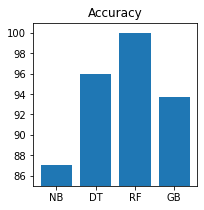

In [92]:
names = ['NB','DT','RF','GB']
values_acc = [87, 96, 99.98, 93.67]
values_prec = [88.53, 94.5, 99.98, 95.67]
values_recall = [86.33, 95.75, 99.98, 94.72]
values_f1 = [86.33, 95.12, 99.98, 95.19]
f = plt.figure(figsize=(10,3),num=10)
plt.subplot(131)
plt.title("Accuracy")
plt.ylim(85,101)
plt.bar(names,values_acc)


<BarContainer object of 4 artists>

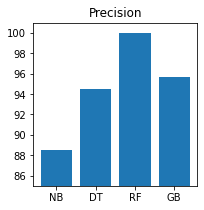

In [93]:
names = ['NB','DT','RF','GB']
values_prec = [88.53, 94.5, 99.98, 95.67]
f = plt.figure(figsize=(10,3),num=10)
plt.subplot(131)
plt.title("Precision")
plt.ylim(85,101)
plt.bar(names,values_prec)
#plt.colorbar(names, values)

<BarContainer object of 4 artists>

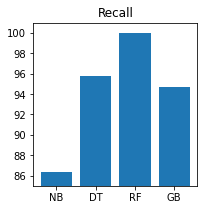

In [94]:
names = ['NB','DT','RF','GB']
values_recall = [86.33, 95.75, 99.98, 94.72]
f = plt.figure(figsize=(10,3),num=10)
plt.subplot(133)
plt.title("Recall")
plt.ylim(85,101)
plt.bar(names,values_recall)

<BarContainer object of 4 artists>

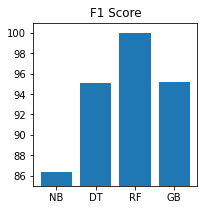

In [95]:
names = ['NB','DT','RF','GB']
values_f1 = [86.33, 95.12, 99.98, 95.19]
f = plt.figure(figsize=(10,3),num=10)
plt.subplot(131)
plt.title("F1 Score")
plt.ylim(85,101)
plt.bar(names,values_f1)
